Уровень кальция в крови здоровых молодых женщин равен в среднем 9.5 милиграммам на децилитр и имеет характерное стандартное отклонение 0.4 мг/дл. В сельской больнице Гватемалы для 160 здоровых беременных женщин при первом обращении для ведения беременности был измерен уровень кальция; среднее значение составило 9.57 мг/дл. Можно ли утверждать, что средний уровень кальция в этой популяции отличается от 9.5?

Посчитайте достигаемый уровень значимости. Поскольку известны только среднее и дисперсия, а не сама выборка, нельзя использовать стандартные функции критериев — нужно реализовать формулу достигаемого уровня значимости самостоятельно.

Округлите ответ до четырёх знаков после десятичной точки.

In [1]:
from scipy import stats

In [2]:
n = 160
mid = 9.5
t = 9.57
sigm = 0.4

In [3]:
z = (t - mid) / sigm * n ** 0.5
print 2 * (1 - stats.norm.cdf(z))
print stats.norm.cdf(z)

0.026856695507523787
0.9865716522462381


Имеются данные о стоимости и размерах 53940 бриллиантов:

Отделите 25% случайных наблюдений в тестовую выборку с помощью функции sklearn.model_selection.train_test_split (зафиксируйте random state = 1). На обучающей выборке настройте две регрессионные модели:

линейную регрессию с помощью LinearRegression без параметров
случайный лес с помощью RandomForestRegressor с random_state=1.
Какая из моделей лучше предсказывает цену бриллиантов? Сделайте предсказания на тестовой выборке, посчитайте модули отклонений предсказаний от истинных цен. Проверьте гипотезу об одинаковом среднем качестве предсказаний, вычислите достигаемый уровень значимости. Отвергается ли гипотеза об одинаковом качестве моделей против двусторонней альтернативы на уровне значимости α=0.05?

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [5]:
df = pd.read_table('diamonds.txt')

/Volumes/Storage/Applications/Programming/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [6]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [7]:
tab = df.to_numpy()

In [8]:
data = tab[:, [0, 1, 2, 4, 5, 6]]
target = tab[:, 3]

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(data, target, test_size=0.25, random_state=1)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_lr = lr.predict(X_test)
dif_lr = np.abs(y_test - y_lr)
print np.average(dif_lr)
print dif_lr

890.3764004285669
[ 214.42235621 1016.46053685   41.87871693 ... 2171.49180326  103.82818096
  159.32529706]


In [11]:
rfr = RandomForestRegressor(random_state=1)
rfr.fit(X_train, y_train)
y_rfr = rfr.predict(X_test)
dif_rfr = np.abs(y_test - y_rfr)
print np.average(dif_rfr)
print dif_rfr

/Volumes/Storage/Applications/Programming/anaconda3/envs/py2/lib/python2.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


802.9205172724115
[ 294.55 1291.6   453.2  ... 1426.    298.7   281.1 ]


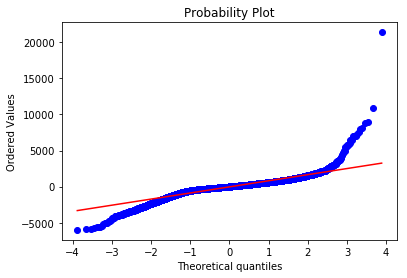

In [12]:
stats.probplot(y_lr - y_rfr, dist = "norm", plot = plt)
plt.show()

In [13]:
stats.ttest_rel(y_rfr, y_lr)

Ttest_relResult(statistic=3.632074526078673, pvalue=0.00028219466485213677)

В предыдущей задаче посчитайте 95% доверительный интервал для разности средних абсолютных ошибок предсказаний регрессии и случайного леса. Чему равна его ближайшая к нулю граница? Округлите до десятков (поскольку случайный лес может давать немного разные предсказания в зависимости от версий библиотек, мы просим вас так сильно округлить, чтобы полученное значение наверняка совпало с нашим).

In [14]:
from statsmodels.stats.weightstats import *

In [15]:
DescrStatsW(dif_lr - dif_rfr).tconfint_mean()

(74.28724532596101, 100.62452098634941)